<a href="https://colab.research.google.com/github/NERDDOOM03/Machine-learning-/blob/main/Mall_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business problem 
 A mall owner wants to understand  the customers who could be easily converted as the target customer and through which they can figure out the marketing ideas and make the strategy.

In [ ]:
# importing the libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
# Uploading the dataset 
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

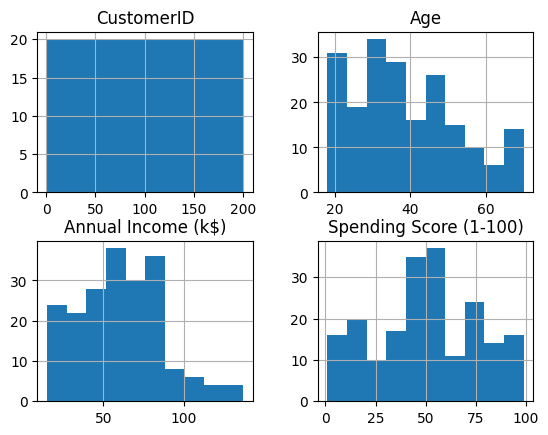

In [ ]:
df.hist()

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

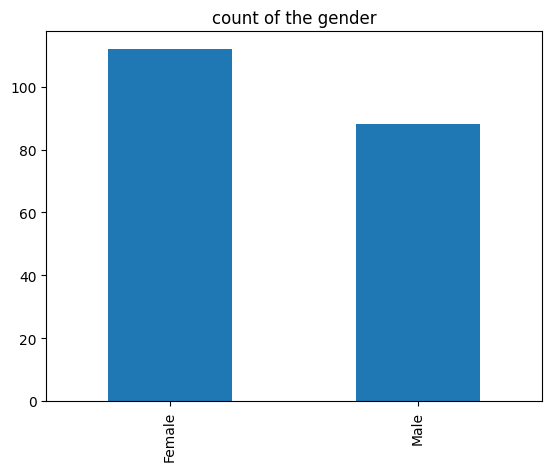

In [ ]:
df['Gender'].value_counts().plot(kind="bar")
plt.title("count of the gender")
plt.show()

Text(0.5, 1.0, 'Relationship between Age and Gender')

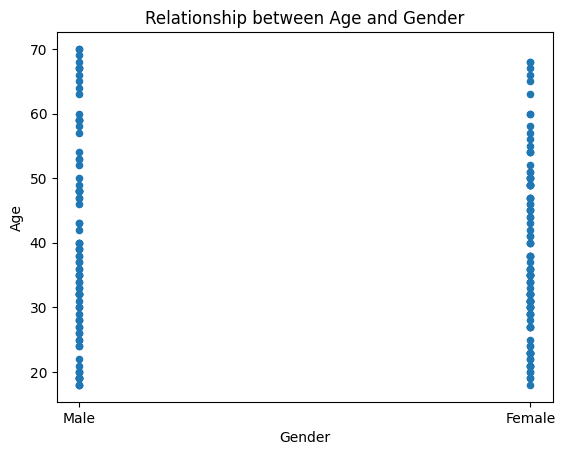

In [ ]:
# scatter the relationship between age and income 
df.plot(kind="scatter",x="Gender", y="Age")
plt.title("Relationship between Age and Gender")

Text(0.5, 1.0, 'Relationship between Gender and Annual income')

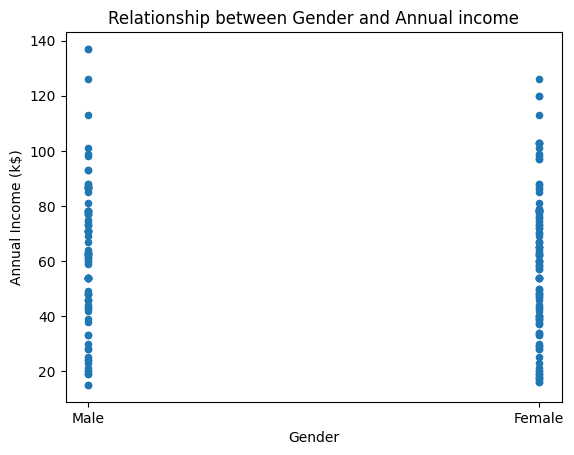

In [ ]:
df.plot(kind="scatter",x="Gender", y="Annual Income (k$)")
plt.title("Relationship between Gender and Annual income")

Text(0.5, 1.0, 'Relationship between Age and Annual income')

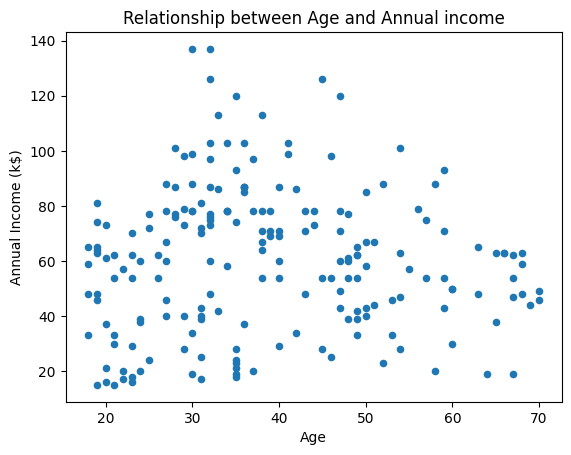

In [ ]:
df.plot(kind="scatter",x="Age", y="Annual Income (k$)")
plt.title("Relationship between Age and Annual income")

Text(0.5, 1.0, 'Relationship between Age and Spending Score (1-100)')

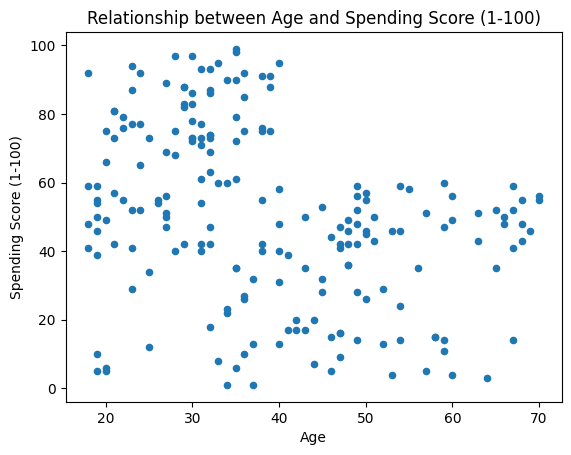

In [ ]:
df.plot(kind="scatter",x="Age", y="Spending Score (1-100)")
plt.title("Relationship between Age and Spending Score (1-100)")

Text(0.5, 1.0, 'Relationship between Age and Spending Score (1-100)')

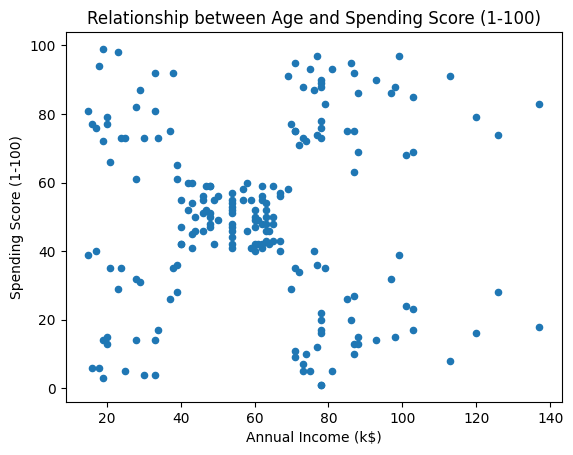

In [ ]:
df.plot(kind="scatter",x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Relationship between Age and Spending Score (1-100)")

In [ ]:
X = df.drop(columns=['CustomerID','Age','Gender'], axis = 1).values


## Visualize the data 


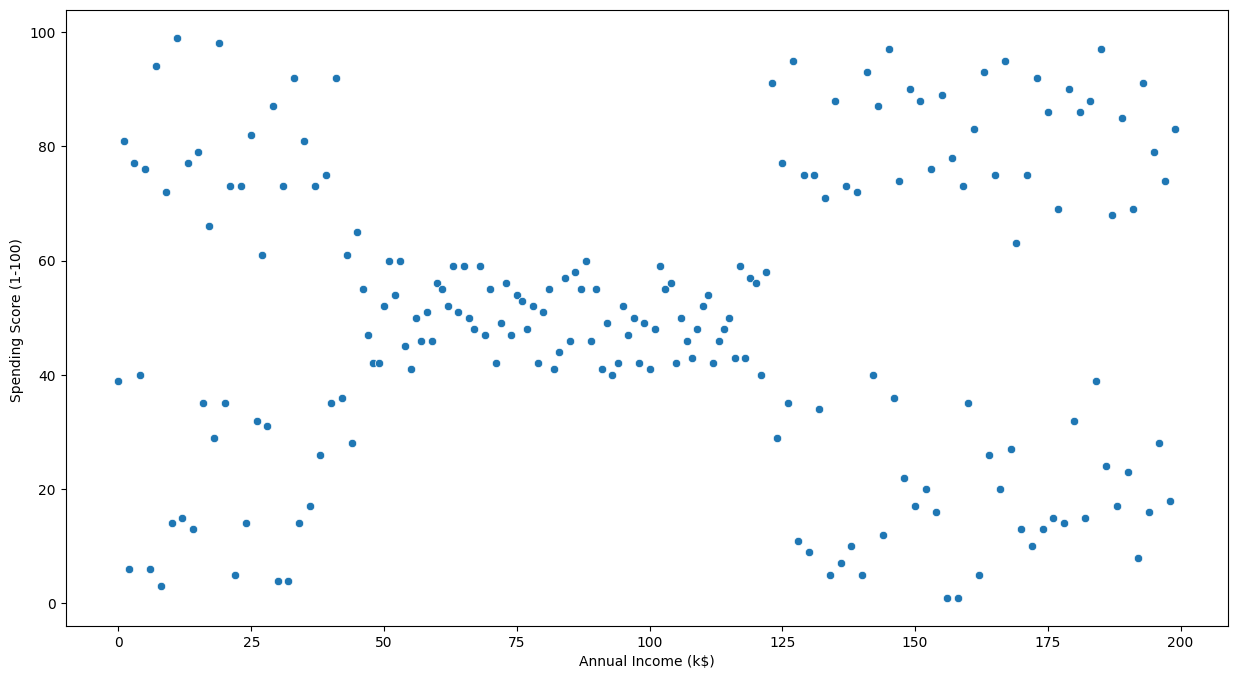

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100) ')
plt.show()


In [ ]:
# Here looking at the graph its very difficult to understand how many clusters we have to make or the optimal value of K and so on
#for such senarios we use elbow method 

## Finding K using Elbow method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

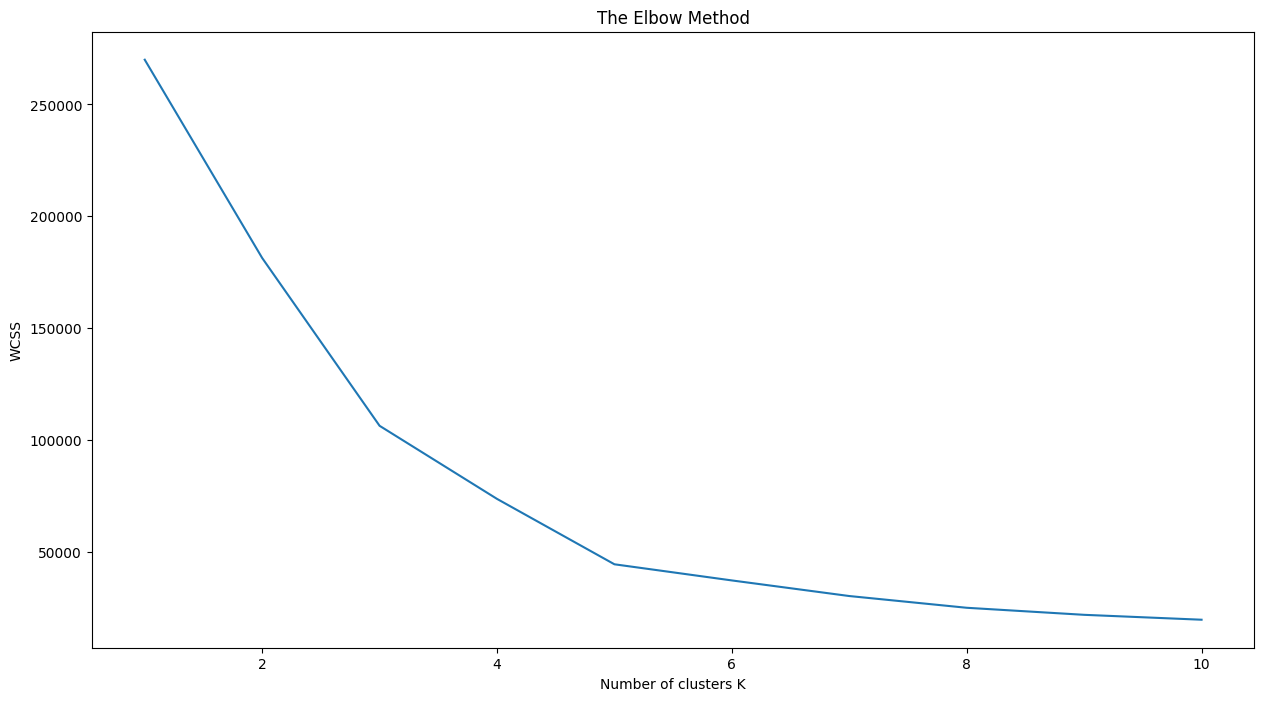

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the dataset 
Kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
Y = Kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
